## Análisis Frubana


Calcular las comisiones que corresponden a cada vendedor (hunter), para ello tener en cuenta las reglas a continuación:

1. Un hunter comisiona solo cuando el valor de sus ventas totales es de 9 Millones de pesos o más.
2. Un hunter comisiona solo cuando tiene más de 6 restaurantes activos (clientes)
3. Un restaurante activo es aquel que tiene 4 o más pedidos.
4. Se comisiona el 8% de la venta total de los clientes/restaurantes activos SIN valor del descuento que se le dio.
5. Un hunter no puede comisionar por un cliente que ya se ha pagado con anterioridad (aparezca en la lista de CLIENTES YA PAGADOS), y las ventas de ese clientes tampoco se tiene en cuenta para el cálculo del total de ventas por hunter (referenciado en el numeral 1).
6. Los clientes con dirección repetida son invalidos para comisionar y tampoco cuentan para el cálculo del total de ventas de un hunter (no se cuenta para ningún limite, ni para la comisión)


### Nota:
Un identificador de un cliente ÚNICO es su ID CLIENTE. Sientase libre de manipular la información de la forma que le convenga(ej: incluir columnas, hojas etc)


# Solución:
Inicialmente (una vez leido los requerimientos para el análisis de los datos), procedemos:
1. Realizar una exploración con las herramientas que nos ofrece python, en este caso más especificamente pandas.
2. Comenzar a limpiar y filtrar los datos, por eso se tomo estrategicamente iniciar la secuencia de los requerimientos de abajo hacia arriba.
3. Generar gráficas para discernir mejor los resultados u optar por contemplar otras perspectivas que nos pueden ofrecer los datos.
4. Concluir

## Importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Explorar dataset

In [2]:
data_fr=pd.read_csv("datafruber.csv", decimal=",")
data_fr_paga=pd.read_csv("data_paga_fruber.csv", decimal=",")
data_fr

,ID CLIENTE,documento,Nombre del cliente,Direccion,Cantidad de Ordenes,# Ordenes con descuento,# Ordenes sin descuento,VENTAS TOTALES,DESCUENTO,VENTAS SIN DESCUENTO,Nombre del Hunter,Fecha creacion del cliente
0,r23m9Xgqr3e6j2KhSVtYQiuy2Dl1,3004241331,Óscar Martínez,carrera42econ8031,8,3.0,5,1831460.0,771925.2,1059534.8,Yiseth Varela,2019-05-07
1,gjznATHhJFXNui1AMFBS6mpxJsc2,79369208,Ñaña y Tuco,carrera100b#75a-5,13,5.0,8,945579.0,360484.0,585095.0,Liceth Cardoso,2019-05-14
2,1kB4VSjvwQQJqRvX2PsGUhKQIkr2,1143256282-1,Él ruby,calle76b#24c-39,2,NaN,2,358800.0,NaN,358800.0,Cilenia Cogollos,2019-06-11
3,x6JuZuMpywaT0e4TpgetJDdomfK2,100000000-3,Áreas y pasteles el choclo,carrera10#72-36,1,NaN,1,27600.0,NaN,27600.0,Yermy Carreño,2019-06-22
4,dVoA3QWbU7MHp9KQv4fpR9bzvKi1,1048285550,Áreas y hamburguesas,calle72#103-2,4,2.0,2,254404.5,147904.5,106500.0,Liceth Cardoso,2019-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...
2555,scVF3JVFmeachLr6g2eaUzhrCM93,1042431679-3,13 de mayo,calle80#68-7barranquillaatlánticocolombia,3,1.0,2,291584.8,128634.8,162950.0,Marisel Comas,2019-06-06
2556,jGTjawi9zkavlQCtS87APRfSora2,901049056-2,109 GRAND SUITES,calle109a#17-52,7,NaN,7,1038057.0,NaN,1038057.0,Etna Duque,2019-03-22
2557,Ff8R4DtsyahYFLwcxnV6r5hdNak2,1020741847,100% Naturales,tv96#70a-85,12,1.0,11,1220411.0,99522.6,1120888.4,Liceth Cardoso,2019-04-26
2558,RTAd8OmFs0WGTcI64OCY0CC1ZN22,79861351,"1,2,3 La parrilla otra vez",calle147#101-56,1,NaN,1,61825.0,NaN,61825.0,Marisol Galvis,2019-06-25


In [3]:
data_fr_paga

,ID CLIENTE,documento,client name,direccion
0,hG2Q1pCOCObgYEBfEj2ZBjZuhD52,700168595-1,wutungling,calle78#53-70
1,UmZlPhoZ9lMVD56YFs8jRrZTmKD2,900566448-1,wasabi food company,calle98#51b-108
2,aGsPOl6UeMOCFlxFo8VfP5FsYfI3,1030558885,vintage home,carrera41a#3b-30
3,h4ZxrLuk2tMrghZJqPO5hFQwEKk2,2222222,tu Wok,calle96#46-32
4,V8okWHULFNNH2qHxZuLWQqPgU2D3,1007280143,sazon de la sabana,carrera47#85-136
...,...,...,...,...
236,SfM5JuL8HIZEl4SkTLUJx9kxsru2,700055096-2,Arana gourmet,calle93#47-151
237,VPLHK42vPXaA8myzIkWPXB6lLCL2,552503229-0,Ana Milena Martinez Montes,calle85#45-56
238,1X7zOs1vFCZBVj2FYFrrvBQzw0D3,1129537195,Alitas,calle99#53-40
239,FOIyK0v9Q3RdYU5BNDG2AeC5beh2,30651448,A fuego,carrera54#58-28


## 6. Eliminar direcciones repetidas 

In [4]:
new_datafr=data_fr.sort_values("Direccion")
new_datafr.drop_duplicates(subset="Direccion", keep=False, inplace=True)
new_datafr
#d=new_datafr.groupby("Direccion").size()
#d


,ID CLIENTE,documento,Nombre del cliente,Direccion,Cantidad de Ordenes,# Ordenes con descuento,# Ordenes sin descuento,VENTAS TOTALES,DESCUENTO,VENTAS SIN DESCUENTO,Nombre del Hunter,Fecha creacion del cliente
1671,62yVaS8K49alodEMBsLVaGbtNfs1,1018453699,LA COSTILLITA BBQ,#107-acalle151c#10732,4,3.0,1,969323.0,703340.5,265982.5,Mauricio Acosta,2019-05-10
94,oOjAZ5JuRkQi9WBrYHb269s8Tgw1,94455647,carlos andres leguizamon,#168a-a168a-99carrera74a#168a57,2,1.0,1,180325.5,59139.0,121186.5,Tatiana Perilla,2019-05-28
2190,M4kttsp928bW6OpulFMyDJhEAbg1,1032428726,Dank bier,#47calle95#08,4,1.0,3,262820.0,96705.0,166115.0,Oscar Vasquez,2019-06-11
293,1bK9ugWh76QslZGL33QnPLoWvVV2,5755852-7,Tienda el tesoro,#7b-a88calle34#7b60barranquillaatlánticocolombia,2,1.0,1,343191.0,74565.0,268626.0,Jonathan Alvarado,2019-06-21
1045,0wVPqDXtUhe2Kzdk1tkycCJpnCn1,19178793,Parrilla 51,40calle51#16,1,NaN,1,105200.0,NaN,105200.0,Walter Linares,2019-06-21
...,...,...,...,...,...,...,...,...,...,...,...,...
1500,xY8cjFjJ55QHs9CInuPsopOHJB93,901082389-9,La sevillana,tv96#70a-86,16,NaN,16,2466940.0,NaN,2466940.0,Liceth Cardoso,2019-04-27
800,7SQk2AGMcnOltijDtahRucWZXTw1,19079280,Restaurante Típico,tv96a#75d-5,7,NaN,7,751700.0,NaN,751700.0,Yenny Bolivar,2019-06-05
542,elamiCliNzPIJXwEmiBLM2TnJdy2,53114922,Superior carnes,tv96b#20a-57,2,NaN,2,105950.0,NaN,105950.0,Ruben Gonzalez,2019-06-14
1409,IYZ6QiX5VJbNdqer2Uc6n14j7wA2,32744328,Los tajamares,via40##83-25barranquillaatlánticocolombia,1,NaN,1,86700.0,NaN,86700.0,Marisel Comas,2019-06-21


## 5. Filtrado de clientes ya pagos

In [5]:
list_id_pago=list(data_fr_paga["ID CLIENTE"].unique())
#list_id_pago
datafr_pago=new_datafr[~new_datafr["ID CLIENTE"].isin(list_id_pago)]
datafr_pago

,ID CLIENTE,documento,Nombre del cliente,Direccion,Cantidad de Ordenes,# Ordenes con descuento,# Ordenes sin descuento,VENTAS TOTALES,DESCUENTO,VENTAS SIN DESCUENTO,Nombre del Hunter,Fecha creacion del cliente
1671,62yVaS8K49alodEMBsLVaGbtNfs1,1018453699,LA COSTILLITA BBQ,#107-acalle151c#10732,4,3.0,1,969323.0,703340.5,265982.5,Mauricio Acosta,2019-05-10
94,oOjAZ5JuRkQi9WBrYHb269s8Tgw1,94455647,carlos andres leguizamon,#168a-a168a-99carrera74a#168a57,2,1.0,1,180325.5,59139.0,121186.5,Tatiana Perilla,2019-05-28
2190,M4kttsp928bW6OpulFMyDJhEAbg1,1032428726,Dank bier,#47calle95#08,4,1.0,3,262820.0,96705.0,166115.0,Oscar Vasquez,2019-06-11
293,1bK9ugWh76QslZGL33QnPLoWvVV2,5755852-7,Tienda el tesoro,#7b-a88calle34#7b60barranquillaatlánticocolombia,2,1.0,1,343191.0,74565.0,268626.0,Jonathan Alvarado,2019-06-21
1045,0wVPqDXtUhe2Kzdk1tkycCJpnCn1,19178793,Parrilla 51,40calle51#16,1,NaN,1,105200.0,NaN,105200.0,Walter Linares,2019-06-21
...,...,...,...,...,...,...,...,...,...,...,...,...
1500,xY8cjFjJ55QHs9CInuPsopOHJB93,901082389-9,La sevillana,tv96#70a-86,16,NaN,16,2466940.0,NaN,2466940.0,Liceth Cardoso,2019-04-27
800,7SQk2AGMcnOltijDtahRucWZXTw1,19079280,Restaurante Típico,tv96a#75d-5,7,NaN,7,751700.0,NaN,751700.0,Yenny Bolivar,2019-06-05
542,elamiCliNzPIJXwEmiBLM2TnJdy2,53114922,Superior carnes,tv96b#20a-57,2,NaN,2,105950.0,NaN,105950.0,Ruben Gonzalez,2019-06-14
1409,IYZ6QiX5VJbNdqer2Uc6n14j7wA2,32744328,Los tajamares,via40##83-25barranquillaatlánticocolombia,1,NaN,1,86700.0,NaN,86700.0,Marisel Comas,2019-06-21


## 6. Descuento del 8% total de ventas a clientes/restaurante activos con venta individual sin descuento

In [6]:
#list_names_hunters=list(hunters["NOMBRE DEL HUNTER"])
#len(list_names_hunters)
valorest_hunters=datafr_pago.groupby('Nombre del Hunter')[["VENTAS TOTALES"]].agg('sum').reset_index()
valorest_hunters
#list2=list(datafr_pago["Nombre del Hunter"].unique())
#len(list2)

,Nombre del Hunter,VENTAS TOTALES
0,Albeiro Chacon,2724541.3
1,Alejandra Sanchez,387699.0
2,Alejandro Morelly,21449927.3
3,Alexander Osorio,12891603.2
4,Ana Ramos,5095768.0
...,...,...
86,Yenny Bolivar,8120229.5
87,Yenny Mendez,4959124.0
88,Yermy Carreño,566430.0
89,Yiseth Varela,55085684.1


## 1. Hunters con ganancias totales igual o por encima 9M

In [7]:
valores_hunt9m= valorest_hunters[valorest_hunters['VENTAS TOTALES']>=9000000]
valores_hunt9m

,Nombre del Hunter,VENTAS TOTALES
2,Alejandro Morelly,21449927.30
3,Alexander Osorio,12891603.20
8,Andres Maury,30874163.20
10,Angelibeth Carbono,35232001.30
15,Cilenia Cogollos,49374909.20
16,Danny Blanco,53893332.63
17,Dioser Noguera,12264585.90
20,Edifer Tafur,28311999.10
21,Edwin Sandoval,13733742.00
22,Elkin Campo,37741760.70


## 3. Se obtiene cuantos restaurantes activos tienen los Hunters

In [8]:
hunter_resa=datafr_pago.groupby('Nombre del Hunter')[["Cantidad de Ordenes"]].apply(lambda x: x[x["Cantidad de Ordenes"]>=4].count()).reset_index().rename(columns={"Cantidad de Ordenes": "Numero Activos"})
hunter_resa

,Nombre del Hunter,Numero Activos
0,Albeiro Chacon,2
1,Alejandra Sanchez,0
2,Alejandro Morelly,9
3,Alexander Osorio,8
4,Ana Ramos,4
...,...,...
86,Yenny Bolivar,9
87,Yenny Mendez,1
88,Yermy Carreño,0
89,Yiseth Varela,21


## 2. Se calcula los Hunters con más de 6 activos

In [9]:
hunter_pros_act=hunter_resa[hunter_resa['Numero Activos']>6]
hunter_pros_act.sort_values('Numero Activos')

,Nombre del Hunter,Numero Activos
72,Pablo Artunduaga,7
3,Alexander Osorio,8
17,Dioser Noguera,8
2,Alejandro Morelly,9
52,Karen Tatiana Urquijo Corredor,9
25,Esteban Manrique,9
43,Jonathan Alvarado,9
86,Yenny Bolivar,9
65,Marisel Comas,11
21,Edwin Sandoval,12


## Se obtiene a los Hunters que pueden comisionar

In [10]:
hunters_com_act=pd.merge(valores_hunt9m, hunter_pros_act, how='inner', on='Nombre del Hunter')
hunters_com_act

,Nombre del Hunter,VENTAS TOTALES,Numero Activos
0,Alejandro Morelly,21449927.30,9
1,Alexander Osorio,12891603.20,8
2,Andres Maury,30874163.20,22
3,Angelibeth Carbono,35232001.30,22
4,Cilenia Cogollos,49374909.20,24
5,Danny Blanco,53893332.63,27
6,Dioser Noguera,12264585.90,8
7,Edifer Tafur,28311999.10,15
8,Edwin Sandoval,13733742.00,12
9,Elkin Campo,37741760.70,17


Para obtener las comisiones que le corresponden a cada hunter, con respecto a la consideración de lo 8% por venta a su cliente sin el valor de descuento. Procedemos:
1. Tenemos el dataframe "hunters_com_act" que nos dice la totalidad de ventas y la cantidad de clientes activos(según específicaciones)
2. Tenemos el dataframe "datafr_pago" que nos otorga algunas caractrísticas de la tabla "data_fr" pero sin direcciones repetidas y descartando los clientes ya pagos que se encuentra en la tabla "data_fr_paga"


Generamos una nueva tabla que contenga solo las características de los clientes (no pagos y excluido direcciones repetidas) de cada Hunter que puede recibir la comisión

In [11]:
name_hunter_sel=list(hunters_com_act['Nombre del Hunter'].unique())
data_pre_com=datafr_pago[datafr_pago['Nombre del Hunter'].isin(name_hunter_sel)]
data_pre_com

,ID CLIENTE,documento,Nombre del cliente,Direccion,Cantidad de Ordenes,# Ordenes con descuento,# Ordenes sin descuento,VENTAS TOTALES,DESCUENTO,VENTAS SIN DESCUENTO,Nombre del Hunter,Fecha creacion del cliente
94,oOjAZ5JuRkQi9WBrYHb269s8Tgw1,94455647,carlos andres leguizamon,#168a-a168a-99carrera74a#168a57,2,1.0,1,180325.5,59139.0,121186.5,Tatiana Perilla,2019-05-28
293,1bK9ugWh76QslZGL33QnPLoWvVV2,5755852-7,Tienda el tesoro,#7b-a88calle34#7b60barranquillaatlánticocolombia,2,1.0,1,343191.0,74565.0,268626.0,Jonathan Alvarado,2019-06-21
962,r9cMeuXQC2StybCGKRUwcQfnGKo1,5712952,Q TACOS GOURMET,61surcarrera10#30c,1,NaN,1,311815.0,NaN,311815.0,Pablo Artunduaga,2019-06-14
1524,i1nH49AHBBX7UJUwjzpP2ckBeZY2,15567957,La mía pizza,87calle139#113,1,NaN,1,52870.0,NaN,52870.0,Marisol Galvis,2019-06-13
1701,8wZX9Pn6Ksa2VCHwL31QPyajzsk2,52797812,Juliana Osorio,98carrera2a#72,2,NaN,2,196785.0,NaN,196785.0,Jessica Pinzon,2019-05-30
...,...,...,...,...,...,...,...,...,...,...,...,...
2468,ZUV1Gj6eM4MbIs26QZ8AFDMUtyi1,52812156,Asadero el castillo del pollo,tv85#64b-4,1,1.0,0,92835.0,92835.0,0.0,Edwin Sandoval,2019-06-20
2557,Ff8R4DtsyahYFLwcxnV6r5hdNak2,1020741847,100% Naturales,tv96#70a-85,12,1.0,11,1220411.0,99522.6,1120888.4,Liceth Cardoso,2019-04-26
1500,xY8cjFjJ55QHs9CInuPsopOHJB93,901082389-9,La sevillana,tv96#70a-86,16,NaN,16,2466940.0,NaN,2466940.0,Liceth Cardoso,2019-04-27
1409,IYZ6QiX5VJbNdqer2Uc6n14j7wA2,32744328,Los tajamares,via40##83-25barranquillaatlánticocolombia,1,NaN,1,86700.0,NaN,86700.0,Marisel Comas,2019-06-21


generamos otra columna llamada comisión sobre el VENTAS SIN DESCUENTO,que solo sera para estos hunters

In [12]:
data_com=data_pre_com
data_com=data_com.reset_index()
data_com.drop('index',inplace=True,axis=1)
data_com

,ID CLIENTE,documento,Nombre del cliente,Direccion,Cantidad de Ordenes,# Ordenes con descuento,# Ordenes sin descuento,VENTAS TOTALES,DESCUENTO,VENTAS SIN DESCUENTO,Nombre del Hunter,Fecha creacion del cliente
0,oOjAZ5JuRkQi9WBrYHb269s8Tgw1,94455647,carlos andres leguizamon,#168a-a168a-99carrera74a#168a57,2,1.0,1,180325.5,59139.0,121186.5,Tatiana Perilla,2019-05-28
1,1bK9ugWh76QslZGL33QnPLoWvVV2,5755852-7,Tienda el tesoro,#7b-a88calle34#7b60barranquillaatlánticocolombia,2,1.0,1,343191.0,74565.0,268626.0,Jonathan Alvarado,2019-06-21
2,r9cMeuXQC2StybCGKRUwcQfnGKo1,5712952,Q TACOS GOURMET,61surcarrera10#30c,1,NaN,1,311815.0,NaN,311815.0,Pablo Artunduaga,2019-06-14
3,i1nH49AHBBX7UJUwjzpP2ckBeZY2,15567957,La mía pizza,87calle139#113,1,NaN,1,52870.0,NaN,52870.0,Marisol Galvis,2019-06-13
4,8wZX9Pn6Ksa2VCHwL31QPyajzsk2,52797812,Juliana Osorio,98carrera2a#72,2,NaN,2,196785.0,NaN,196785.0,Jessica Pinzon,2019-05-30
...,...,...,...,...,...,...,...,...,...,...,...,...
1158,ZUV1Gj6eM4MbIs26QZ8AFDMUtyi1,52812156,Asadero el castillo del pollo,tv85#64b-4,1,1.0,0,92835.0,92835.0,0.0,Edwin Sandoval,2019-06-20
1159,Ff8R4DtsyahYFLwcxnV6r5hdNak2,1020741847,100% Naturales,tv96#70a-85,12,1.0,11,1220411.0,99522.6,1120888.4,Liceth Cardoso,2019-04-26
1160,xY8cjFjJ55QHs9CInuPsopOHJB93,901082389-9,La sevillana,tv96#70a-86,16,NaN,16,2466940.0,NaN,2466940.0,Liceth Cardoso,2019-04-27
1161,IYZ6QiX5VJbNdqer2Uc6n14j7wA2,32744328,Los tajamares,via40##83-25barranquillaatlánticocolombia,1,NaN,1,86700.0,NaN,86700.0,Marisel Comas,2019-06-21


In [13]:
data_com_t=data_com
data_com_t['COMISION']=data_com_t['VENTAS SIN DESCUENTO'].apply(lambda x:x*0.08)
data_com_t

,ID CLIENTE,documento,Nombre del cliente,Direccion,Cantidad de Ordenes,# Ordenes con descuento,# Ordenes sin descuento,VENTAS TOTALES,DESCUENTO,VENTAS SIN DESCUENTO,Nombre del Hunter,Fecha creacion del cliente,COMISION
0,oOjAZ5JuRkQi9WBrYHb269s8Tgw1,94455647,carlos andres leguizamon,#168a-a168a-99carrera74a#168a57,2,1.0,1,180325.5,59139.0,121186.5,Tatiana Perilla,2019-05-28,9694.920
1,1bK9ugWh76QslZGL33QnPLoWvVV2,5755852-7,Tienda el tesoro,#7b-a88calle34#7b60barranquillaatlánticocolombia,2,1.0,1,343191.0,74565.0,268626.0,Jonathan Alvarado,2019-06-21,21490.080
2,r9cMeuXQC2StybCGKRUwcQfnGKo1,5712952,Q TACOS GOURMET,61surcarrera10#30c,1,NaN,1,311815.0,NaN,311815.0,Pablo Artunduaga,2019-06-14,24945.200
3,i1nH49AHBBX7UJUwjzpP2ckBeZY2,15567957,La mía pizza,87calle139#113,1,NaN,1,52870.0,NaN,52870.0,Marisol Galvis,2019-06-13,4229.600
4,8wZX9Pn6Ksa2VCHwL31QPyajzsk2,52797812,Juliana Osorio,98carrera2a#72,2,NaN,2,196785.0,NaN,196785.0,Jessica Pinzon,2019-05-30,15742.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,ZUV1Gj6eM4MbIs26QZ8AFDMUtyi1,52812156,Asadero el castillo del pollo,tv85#64b-4,1,1.0,0,92835.0,92835.0,0.0,Edwin Sandoval,2019-06-20,0.000
1159,Ff8R4DtsyahYFLwcxnV6r5hdNak2,1020741847,100% Naturales,tv96#70a-85,12,1.0,11,1220411.0,99522.6,1120888.4,Liceth Cardoso,2019-04-26,89671.072
1160,xY8cjFjJ55QHs9CInuPsopOHJB93,901082389-9,La sevillana,tv96#70a-86,16,NaN,16,2466940.0,NaN,2466940.0,Liceth Cardoso,2019-04-27,197355.200
1161,IYZ6QiX5VJbNdqer2Uc6n14j7wA2,32744328,Los tajamares,via40##83-25barranquillaatlánticocolombia,1,NaN,1,86700.0,NaN,86700.0,Marisel Comas,2019-06-21,6936.000


Ahora ya tenemos, la comsion alrededor de los valores de venta por cliente sin descuento, apartir de esta tabla, podemos obtener quien generó la mayor comision, quien la menor y el promedio entre comisiones, para cada hunter.

In [14]:
sumary_com_hunt=data_com_t.groupby('Nombre del Hunter').agg({'COMISION':['min', 'mean', 'max']})
sumary_com_hunt

COMISION                          
                                    min          mean         max
Nombre del Hunter                                                
Alejandro Morelly                   0.0  31006.085128  257583.600
Alexander Osorio                    0.0   5395.586977  141832.560
Andres Maury                        0.0  25107.532296  215354.368
Angelibeth Carbono                  0.0  16639.985176  219999.984
Cilenia Cogollos                    0.0  25856.058065  313095.200
Danny Blanco                        0.0  20213.006027  195045.600
Dioser Noguera                      0.0   9026.911636   63833.600
Edifer Tafur                        0.0  22838.986133  290208.480
Edwin Sandoval                      0.0   9820.123077   55064.000
Elkin Campo                         0.0  32521.433143  355757.040
Eloisa Mazillo                      0.0  27754.051586  147964.048
Esteban Manrique                    0.0  28969.273846  152256.800
Jessica Pinzon                      0.0  23508.622000  111471.200
Johana Hernandez                    0.0  22974.518545  182499.600
Jonathan Alvarado                   0.0  41657.553333  408271.600
Karen Tatiana Urquijo Corredor      0.0  54217.560000  414136.640
Liceth Cardoso                      0.0  17673.338985  197355.200
Manuel Capera                       0.0  30584.365508  211230.800
Marisel Comas                       0.0  16683.222783  530095.920
Marisol Galvis                      0.0   9920.929231   66496.800
Milagros Rodriguez                  0.0  21985.933183  308595.360
Norelys Santiago                    0.0  21563.933091  205028.000
Pablo Artunduaga                    0.0  24355.858000  154465.472
Sandra Carrillo                     0.0   9394.823484  166913.120
Tatiana Perilla                     0.0  34665.158788  420417.600
Viviana Blanco                      0.0  19563.703400  152090.120
Yiseth Varela                       0.0  42246.466512  659992.800

de la tabla anterior podemos deducir cual hunter tuvo un promedio más alto en ventas

In [55]:
sumary_com_hunt_max=pd.DataFrame({'comision_max':sumary_com_hunt[('COMISION','max')]})
sumary_com_hunt_max.sort_values(by='comision_max', ascending=False)

,comision_max
Nombre del Hunter,
Yiseth Varela,659992.800
Marisel Comas,530095.920
Tatiana Perilla,420417.600
Karen Tatiana Urquijo Corredor,414136.640
Jonathan Alvarado,408271.600
Elkin Campo,355757.040
Cilenia Cogollos,313095.200
Milagros Rodriguez,308595.360
Edifer Tafur,290208.480


por el dataframe anterior logramos evidenciar que la máxima comision por un venta la tiene Yiseth Varela

In [58]:
sumary_com_hunt_mean=pd.DataFrame({'promedio':sumary_com_hunt[('COMISION','mean')]})
sumary_com_hunt_mean.sort_values(by='promedio', ascending=False)

,promedio
Nombre del Hunter,
Karen Tatiana Urquijo Corredor,54217.560000
Yiseth Varela,42246.466512
Jonathan Alvarado,41657.553333
Tatiana Perilla,34665.158788
Elkin Campo,32521.433143
Alejandro Morelly,31006.085128
Manuel Capera,30584.365508
Esteban Manrique,28969.273846
Eloisa Mazillo,27754.051586


el hunter que ha obtenido en promedio más comisiones Karen Tatiana Urquijo

In [22]:
hunter_vent_com=data_com_t.groupby('Nombre del Hunter')['COMISION'].sum()
df_hunter_vent_com=pd.DataFrame({'Nombre del Hunter':hunter_vent_com.index, 'COMISION TOTAL':hunter_vent_com.values})
#hunter_com_t=pd.DataFrame(hunter_vent_com, columns=['Nombre del Hunter', 'COMISIONES TOTALES'])
#hunter_com_t
#df_hunter_vent_com.reset_index(inplace=True)
#df_hunter_vent_com.drop('index', inplace=True, axis=1)
#df_hunter_vent_com
df_hunter_vent_com.sort_values(by='COMISION TOTAL', ascending=False)


,Nombre del Hunter,COMISION TOTAL
24,Tatiana Perilla,2.287900e+06
26,Yiseth Varela,2.112323e+06
17,Manuel Capera,1.865646e+06
4,Cilenia Cogollos,1.603076e+06
14,Jonathan Alvarado,1.499672e+06
5,Danny Blanco,1.475549e+06
15,Karen Tatiana Urquijo Corredor,1.463874e+06
2,Andres Maury,1.355807e+06
0,Alejandro Morelly,1.209237e+06
16,Liceth Cardoso,1.184114e+06


organizando los valores de comisiones de los más altos al minimo, observamos que el comisionista con mayor ganancias por ventas sin descuento es Tatiana Perilla y el menor es Dioser Noguera

In [105]:

table_result['BASE COMISION']=np.where((table_result["Numero Activos"]>0) & (table_result['VENTAS TOTALES']>9000000), "Verdadero","Falso")
table_result

,Nombre del Hunter,VENTAS TOTALES,Numero Activos,VENTAS DE ACTIVOS,BASE COMISION
0,Albeiro Chacon,2724541.3,2,1227812.0,Falso
1,Alejandra Sanchez,387699.0,0,0.0,Falso
2,Alejandro Morelly,21449927.3,9,12881451.0,Verdadero
3,Alexander Osorio,12891603.2,8,7390450.2,Verdadero
4,Ana Ramos,5095768.0,4,2439319.0,Falso
...,...,...,...,...,...
86,Yenny Bolivar,8120229.5,9,5737636.5,Falso
87,Yenny Mendez,4959124.0,1,2294883.0,Falso
88,Yermy Carreño,566430.0,0,0.0,Falso
89,Yiseth Varela,55085684.1,21,44664061.7,Verdadero


In [107]:
table_result["COMISION A RECIBIR"]=np.where(table_result["BASE COMISION"]=="Verdadero",table_result["VENTAS DE ACTIVOS"]*0.08,0)
table_result

,Nombre del Hunter,VENTAS TOTALES,Numero Activos,VENTAS DE ACTIVOS,BASE COMISION,COMISION A RECIBIR
0,Albeiro Chacon,2724541.3,2,1227812.0,Falso,0.000
1,Alejandra Sanchez,387699.0,0,0.0,Falso,0.000
2,Alejandro Morelly,21449927.3,9,12881451.0,Verdadero,1030516.080
3,Alexander Osorio,12891603.2,8,7390450.2,Verdadero,591236.016
4,Ana Ramos,5095768.0,4,2439319.0,Falso,0.000
...,...,...,...,...,...,...
86,Yenny Bolivar,8120229.5,9,5737636.5,Falso,0.000
87,Yenny Mendez,4959124.0,1,2294883.0,Falso,0.000
88,Yermy Carreño,566430.0,0,0.0,Falso,0.000
89,Yiseth Varela,55085684.1,21,44664061.7,Verdadero,3573124.936


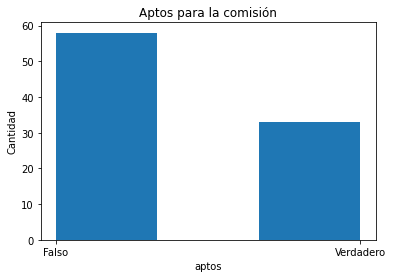

In [142]:
#table_result.to_csv("resultados.csv", index=False, sep=",", decimal=".")
x=table_result['BASE COMISION']

plt.hist(x, bins=3)
#plt.xticks(rotation=45)
plt.title("Aptos para la comisión")
plt.xlabel("aptos")
plt.ylabel("Cantidad")
plt.show()

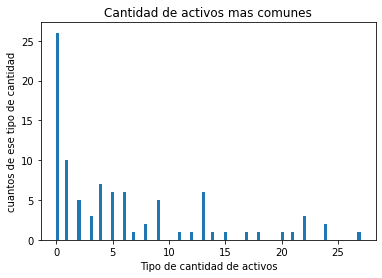

In [143]:
x=table_result['Numero Activos']

plt.hist(x, bins=100)
#plt.xticks(rotation=45)
plt.title("Cantidad de activos mas comunes")
plt.xlabel("Tipo de cantidad de activos")
plt.ylabel("cuantos de ese tipo de cantidad")
plt.show()

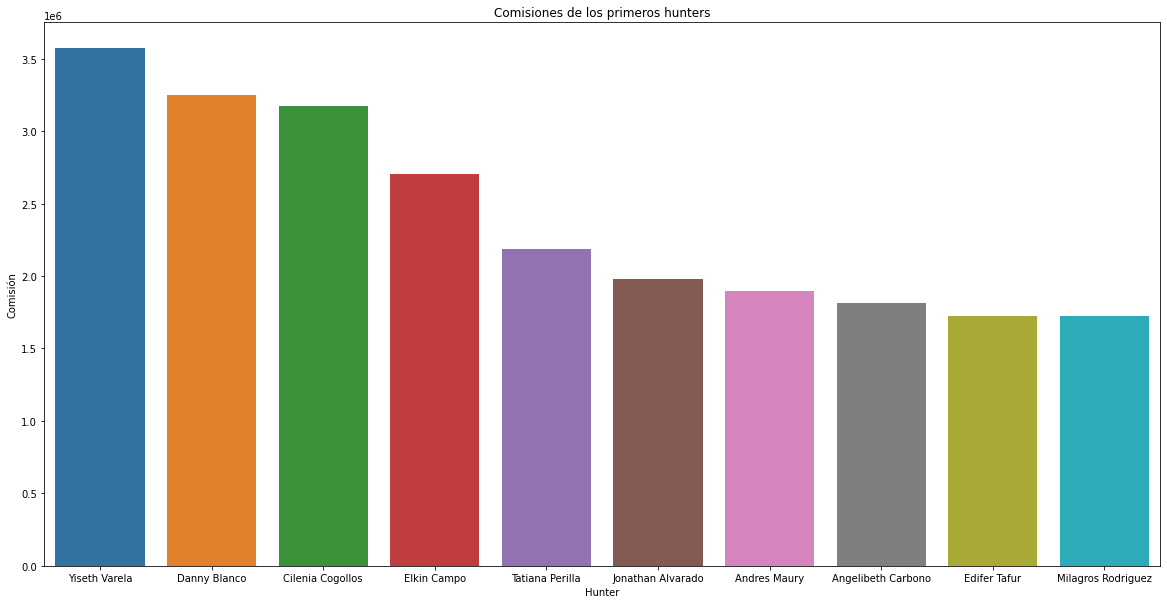

In [139]:
group_hunter=table_result.sort_values(ascending=False, by=["COMISION A RECIBIR"]).copy()[:10]
plt.figure(figsize=(20,10))
graph=sns.barplot(data=group_hunter, x="Nombre del Hunter", y="COMISION A RECIBIR")
graph.set(title="Comisiones de los primeros hunters", xlabel="Hunter", ylabel="Comisión");